## COLLECTING DATA

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import math

In [4]:
dataset = pd.read_csv('titanic.csv')
print(dataset.shape)

(891, 12)


## ANALYSING THE DATA

In [14]:
print(dataset.head(10))

   PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   
5            6         0       3   
6            7         0       1   
7            8         0       3   
8            9         1       3   
9           10         1       2   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   
5                                   Moran, Mr. James    male   NaN      0   
6                            McCarthy, Mr. Timothy J    male  54

In [18]:
print(dataset.groupby('Sex').size())

Sex
female    314
male      577
dtype: int64


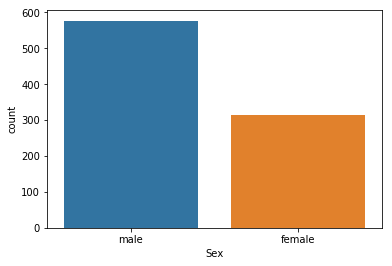

In [5]:
sns.countplot(x="Sex",data=dataset)

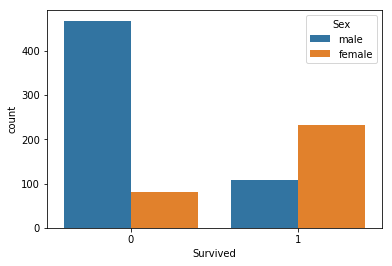

In [25]:

sns.countplot(x="Survived",hue="Sex",data=dataset)


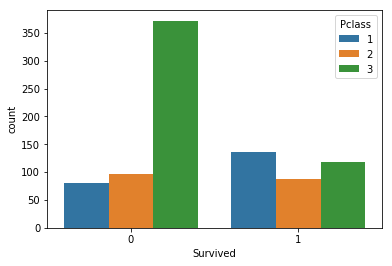

In [29]:
sns.countplot(x="Survived",hue="Pclass",data=dataset)


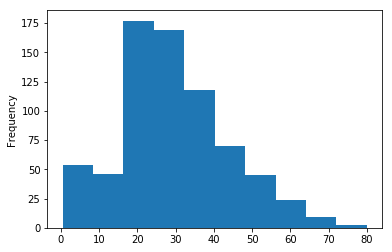

In [32]:
dataset['Age'].plot.hist()

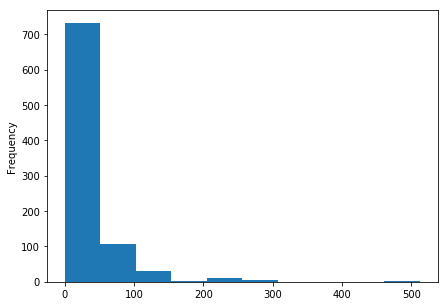

In [40]:
dataset['Fare'].plot.hist(figsize=(7,5))

In [41]:
print(dataset.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB
None


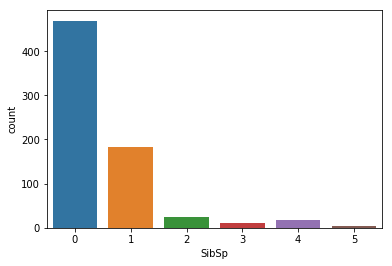

In [83]:
sns.countplot(x="SibSp",data=dataset)

## WRANGLING THE DATA

TypeError: numpy boolean subtract, the `-` operator, is deprecated, use the bitwise_xor, the `^` operator, or the logical_xor function instead.

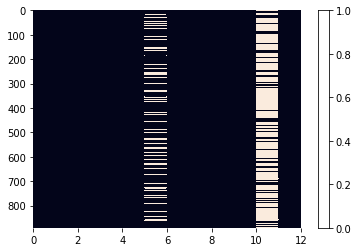

In [12]:
sns.heatmap(dataset.isnull())

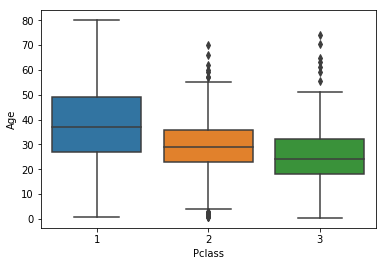

In [55]:
sns.boxplot(x="Pclass",y="Age",data=dataset)

In [62]:
dataset.drop("Cabin",axis=1,inplace=True)

In [64]:
dataset.dropna(inplace=True)

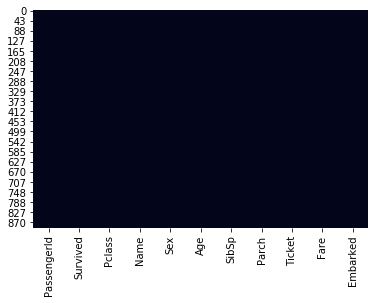

In [66]:
sns.heatmap(dataset.isnull(),cbar=False)

In [67]:
dataset.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64

In [71]:
sex=pd.get_dummies(dataset['Sex'],drop_first=True)
sex.head(4)

,male
0,1
1,0
2,0
3,0


In [72]:
embark = pd.get_dummies(dataset['Embarked'],drop_first=True)
embark.head(5)

,Q,S
0,0,1
1,0,0
2,0,1
3,0,1
4,0,1


In [73]:
passenger = pd.get_dummies(dataset['Pclass'],drop_first=True)
passenger.head(5)

,2,3
0,0,1
1,0,0
2,0,1
3,0,0
4,0,1


In [75]:
dataset = pd.concat([dataset,sex,embark,passenger],axis=1)

In [76]:
dataset.head(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,male,Q,S,2,3
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S,1,0,1,0,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C,0,0,0,0,0
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S,0,0,1,0,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S,0,0,1,0,0
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S,1,0,1,0,1


In [80]:
dataset.drop(['PassengerId','Pclass','Sex','Embarked','Name','Ticket'],axis=1,inplace=True)

In [81]:
dataset.head(5)

,Survived,Age,SibSp,Parch,Fare,male,Q,S,2,3
0,0,22.0,1,0,7.2500,1,0,1,0,1
1,1,38.0,1,0,71.2833,0,0,0,0,0
2,1,26.0,0,0,7.9250,0,0,1,0,1
3,1,35.0,1,0,53.1000,0,0,1,0,0
4,0,35.0,0,0,8.0500,1,0,1,0,1


## TRAIN DATA

In [91]:
X = dataset.drop('Survived',axis=1)
y = dataset['Survived']

In [92]:
from sklearn.cross_validation import train_test_split

In [93]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)

In [94]:
from sklearn.linear_model import LogisticRegression

In [95]:
logmodel = LogisticRegression()

In [97]:
logmodel.fit(X_train,y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [98]:
predictions = logmodel.predict(X_test)

In [104]:
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score

In [105]:
classification_report(y_test,predictions)

'             precision    recall  f1-score   support\n\n          0       0.81      0.83      0.82       126\n          1       0.75      0.72      0.73        88\n\navg / total       0.78      0.79      0.78       214\n'

In [106]:
confusion_matrix(y_test,predictions)

array([[105,  21],
       [ 25,  63]])

## ACCURACY CHECKING

In [115]:
accuracy_score(y_test,predictions)*100

78.50467289719626